In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
           0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
           4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,
           0,  12,  10

In [6]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [7]:
classes=["T-shirt","Trouser","Pllover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [8]:
def plot_images(index):
    plt.figure(figsize=(8,2))
    plt.imshow(X_train[index])

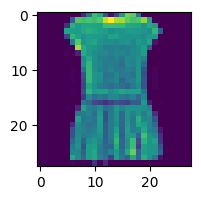

In [9]:
plot_images(3)

In [10]:
classes[3]

'Dress'

In [11]:
classes[y_train[3]]

'Dress'

In [12]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [13]:
y_train_categorical=tf.keras.utils.to_categorical(y_train,num_classes=10,dtype="float32")
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test_categorical=tf.keras.utils.to_categorical(y_test,num_classes=10,dtype="float32")
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(5000, activation="relu"),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(optimizer="Adam",
             loss="categorical_crossentropy",
             metrics="accuracy")
model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 19s 6ms/step - loss: 0.5055 - accuracy: 0.8189
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3767 - accuracy: 0.8640
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3348 - accuracy: 0.8768
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3118 - accuracy: 0.8847
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2932 - accuracy: 0.8912
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2806 - accuracy: 0.8952
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2666 - accuracy: 0.8998
Epoch 8/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2597 - accuracy: 0.9032
Epoch 9/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2455 - accuracy: 0.9069
Epoch 10/50
1875/1875 [==============================] - 11s 6ms/step - l

In [16]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 1s 2ms/step


'Ankle Boot'

In [17]:
classes[y_test[0]]

'Ankle Boot'

In [18]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(5000, activation="relu"),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(optimizer="SGD",
             loss="categorical_crossentropy",
             metrics="accuracy")
model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6244 - accuracy: 0.7911
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4358 - accuracy: 0.8477
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3913 - accuracy: 0.8613
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3619 - accuracy: 0.8710
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3405 - accuracy: 0.8786
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3229 - accuracy: 0.8842
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3078 - accuracy: 0.8896
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2945 - accuracy: 0.8931
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2827 - accuracy: 0.8976
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.